In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import csr_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv('Dataset.csv')

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.isnull()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
14994,False,False,False,False,False,False,False,False,False,False
14995,False,False,False,False,False,False,False,False,False,False
14996,False,False,False,False,False,False,False,False,False,False
14997,False,False,False,False,False,False,False,False,False,False


In [5]:
df.dropna(how = 'any')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [6]:
df.rename(columns={df.columns[0]: 'sn'}, inplace=True)


In [7]:
df.head()

,sn,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [8]:
df1 = df[['Department','salary']]

In [9]:
df2 = df.drop(['Department','salary'], axis = 1)

In [10]:
df2.head()

,sn,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


In [11]:
df2.groupby('left').mean()

,sn,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [12]:
DF = pd.concat([df1,df2],axis=1)

In [13]:
df

,sn,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


<Axes: xlabel='salary'>

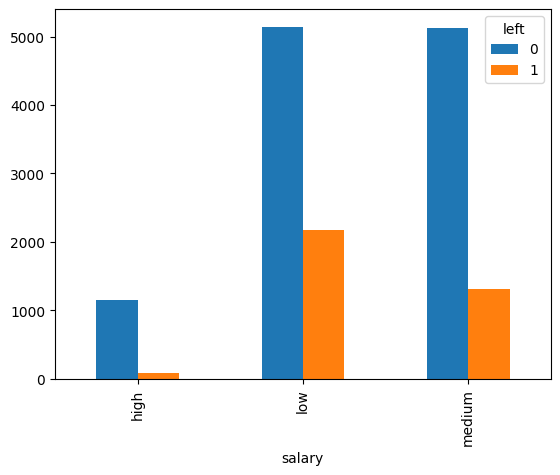

In [14]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

<Axes: xlabel='Department'>

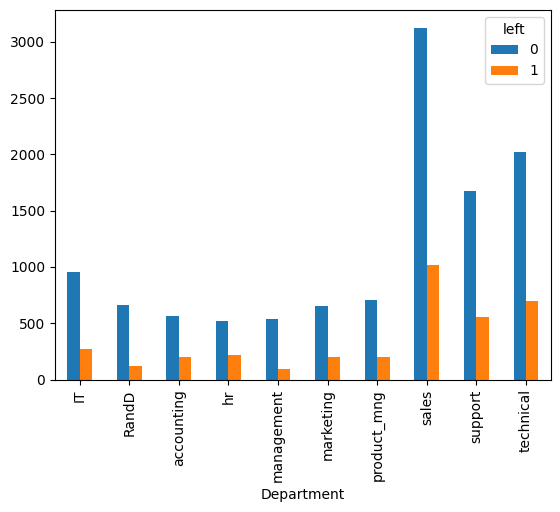

In [15]:
pd.crosstab(df.Department,df.left).plot(kind= 'bar')

Text(0, 0.5, 'left')

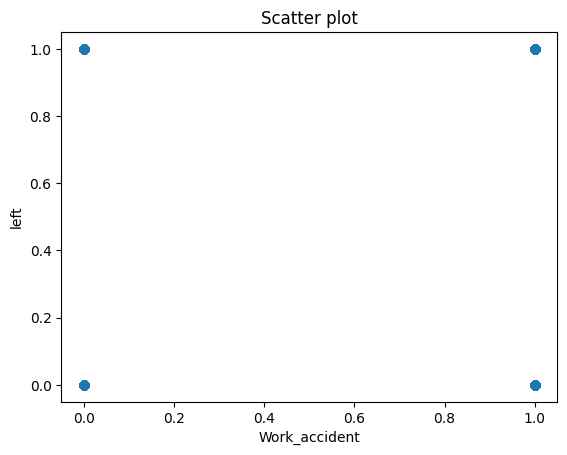

In [16]:
plt.scatter(df.Work_accident,df.left)
plt.title('Scatter plot')
plt.xlabel('Work_accident')
plt.ylabel('left')

In [17]:
x_train = df.drop(['left','Department'], axis = 1)
x_train

,sn,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary
0,0.38,0.53,2,157,3,0,0,low
1,0.80,0.86,5,262,6,0,0,medium
2,0.11,0.88,7,272,4,0,0,medium
3,0.72,0.87,5,223,5,0,0,low
4,0.37,0.52,2,159,3,0,0,low
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,low
14995,0.37,0.48,2,160,3,0,0,low
14996,0.37,0.53,2,143,3,0,0,low
14997,0.11,0.96,6,280,4,0,0,low


In [18]:
y = df[['left']]

In [19]:
catfea = [feature for feature in x_train.columns if x_train[feature].dtypes == 'O']
catfea

['salary']

In [20]:
x_train[catfea]

,salary
0,low
1,medium
2,medium
3,low
4,low
...,...
14994,low
14995,low
14996,low
14997,low


In [21]:
for feature in catfea:
    print(feature, ':', len( x_train[feature].unique()))

salary : 3


In [22]:
ohe = OneHotEncoder()

In [23]:
 sparse_matrix = ohe.fit_transform(x_train[['salary']])
dense_array =  sparse_matrix.toarray()
dum = pd.DataFrame(dense_array)

In [24]:
dum

,0,1,2
0,0.0,1.0,0.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
14994,0.0,1.0,0.0
14995,0.0,1.0,0.0
14996,0.0,1.0,0.0
14997,0.0,1.0,0.0


In [25]:
x1= pd.concat([x_train,dum],axis = 1)

In [26]:
x1

,sn,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,0,1,2
0,0.38,0.53,2,157,3,0,0,low,0.0,1.0,0.0
1,0.80,0.86,5,262,6,0,0,medium,0.0,0.0,1.0
2,0.11,0.88,7,272,4,0,0,medium,0.0,0.0,1.0
3,0.72,0.87,5,223,5,0,0,low,0.0,1.0,0.0
4,0.37,0.52,2,159,3,0,0,low,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,low,0.0,1.0,0.0
14995,0.37,0.48,2,160,3,0,0,low,0.0,1.0,0.0
14996,0.37,0.53,2,143,3,0,0,low,0.0,1.0,0.0
14997,0.11,0.96,6,280,4,0,0,low,0.0,1.0,0.0


In [27]:
x =x1.drop(['salary'], axis=1)

In [28]:
x.head()

,sn,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,0,1,2
0,0.38,0.53,2,157,3,0,0,0.0,1.0,0.0
1,0.80,0.86,5,262,6,0,0,0.0,0.0,1.0
2,0.11,0.88,7,272,4,0,0,0.0,0.0,1.0
3,0.72,0.87,5,223,5,0,0,0.0,1.0,0.0
4,0.37,0.52,2,159,3,0,0,0.0,1.0,0.0


In [29]:
x.rename(columns = {0:'high' , 1:'low', 2:'medium'}, inplace = True)
x.columns

Index(['sn', 'last_evaluation', 'number_project', 'average_montly_hours',
       'time_spend_company', 'Work_accident', 'promotion_last_5years', 'high',
       'low', 'medium'],
      dtype='object')

In [30]:
x

,sn,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,high,low,medium
0,0.38,0.53,2,157,3,0,0,0.0,1.0,0.0
1,0.80,0.86,5,262,6,0,0,0.0,0.0,1.0
2,0.11,0.88,7,272,4,0,0,0.0,0.0,1.0
3,0.72,0.87,5,223,5,0,0,0.0,1.0,0.0
4,0.37,0.52,2,159,3,0,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,0.0,1.0,0.0
14995,0.37,0.48,2,160,3,0,0,0.0,1.0,0.0
14996,0.37,0.53,2,143,3,0,0,0.0,1.0,0.0
14997,0.11,0.96,6,280,4,0,0,0.0,1.0,0.0


In [31]:
feature_sel = SelectFromModel(Lasso(alpha = 0.008, random_state = 0))
feature_sel.fit(x, y)

SelectFromModel(estimator=Lasso(alpha=0.008, random_state=0))

In [32]:
feature_sel.get_support()

array([ True, False,  True,  True,  True,  True, False,  True,  True,
       False])

In [33]:
sel_feat = x.columns[(feature_sel.get_support())]

In [34]:
sel_feat

Index(['sn', 'number_project', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'high', 'low'],
      dtype='object')

In [35]:
x1 = x[sel_feat]

In [36]:
x1

,sn,number_project,average_montly_hours,time_spend_company,Work_accident,high,low
0,0.38,2,157,3,0,0.0,1.0
1,0.80,5,262,6,0,0.0,0.0
2,0.11,7,272,4,0,0.0,0.0
3,0.72,5,223,5,0,0.0,1.0
4,0.37,2,159,3,0,0.0,1.0
...,...,...,...,...,...,...,...
14994,0.40,2,151,3,0,0.0,1.0
14995,0.37,2,160,3,0,0.0,1.0
14996,0.37,2,143,3,0,0.0,1.0
14997,0.11,6,280,4,0,0.0,1.0


In [37]:
x1.head()

,sn,number_project,average_montly_hours,time_spend_company,Work_accident,high,low
0,0.38,2,157,3,0,0.0,1.0
1,0.80,5,262,6,0,0.0,0.0
2,0.11,7,272,4,0,0.0,0.0
3,0.72,5,223,5,0,0.0,1.0
4,0.37,2,159,3,0,0.0,1.0


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x1,y,test_size=0.2)

# Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [40]:
model.fit(X_train, y_train)

C:\Users\thars\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thars\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [42]:
model.score(X_test,y_test)

0.7873333333333333

In [43]:
y_pred= model.predict(X_test)

In [44]:
con = confusion_matrix(y_test,y_pred)

In [45]:
con

array([[2139,  152],
       [ 486,  223]], dtype=int64)

In [46]:
cl = classification_report(y_test,y_pred)

In [47]:
print(cl)

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      2291
           1       0.59      0.31      0.41       709

    accuracy                           0.79      3000
   macro avg       0.70      0.62      0.64      3000
weighted avg       0.76      0.79      0.76      3000



# Applying GaussianNB

In [48]:
from sklearn.naive_bayes import GaussianNB

In [49]:
ngb = GaussianNB()

In [50]:
ngb.fit(X_train, y_train)

C:\Users\thars\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [51]:
ngb.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [52]:
ngb.score(X_test,y_test)

0.8103333333333333

In [53]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[2139,  152],
       [ 486,  223]], dtype=int64)

In [54]:
clp = classification_report(y_test,y_pred)
print(clp)

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      2291
           1       0.59      0.31      0.41       709

    accuracy                           0.79      3000
   macro avg       0.70      0.62      0.64      3000
weighted avg       0.76      0.79      0.76      3000



# Applying DecisionTreeClassifier

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
dtc = DecisionTreeClassifier()

In [57]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [58]:
y_pred = dtc.predict(X_test)

In [59]:
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [60]:
dtc.score(X_test,y_test)

0.9786666666666667

In [61]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[2249,   42],
       [  22,  687]], dtype=int64)

In [62]:
cl = classification_report(y_test,y_pred)
print(cl)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2291
           1       0.94      0.97      0.96       709

    accuracy                           0.98      3000
   macro avg       0.97      0.98      0.97      3000
weighted avg       0.98      0.98      0.98      3000



In [63]:
from sklearn.model_selection import cross_val_score

In [64]:
cross_dtc = cross_val_score(dtc,x1,y)

In [65]:
cross_dtc

array([0.97833333, 0.96      , 0.96466667, 0.98366667, 0.97665889])

In [66]:
cross_dtc.mean()

0.9726651105924198

# Applying RandomForestClassifier

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
rf = RandomForestClassifier(n_estimators = 10)

In [69]:
rf.fit(X_train, y_train)

C:\Users\thars\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=10)

In [70]:
y_pred = rf.predict(X_test)

In [71]:
rf.score(X_test,y_test)

0.987

In [72]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[2278,   13],
       [  26,  683]], dtype=int64)

In [73]:
cl = classification_report(y_test,y_pred)
print(cl)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2291
           1       0.98      0.96      0.97       709

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



In [74]:
from sklearn.model_selection import cross_val_score

In [75]:
cross_rf = cross_val_score(rf,x1,y)

C:\Users\thars\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\thars\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\thars\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\thars\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConvers

In [76]:
cross_rf.mean()

0.985665621873958

In [77]:
import pickle

In [78]:
with open('rfmodel_pickle', 'wb') as f:
    pickle.dump(rf , f)

In [79]:
with open('rfmodel_pickle', 'rb') as f:
    rfc = pickle.load(f)